In [10]:
data = pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/student-mat.csv')
data.head()

<IPython.core.display.Javascript object>

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [11]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [12]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [55]:
#now check the data is follow the gussain distribution or not so that we are using QQ Ploat
import scipy.stats as stat
import pylab
%matplotlib inline
def check_gaussain(data,feature):
    try:
        plt.figure(figsize=(20,15))
        plt.subplot(1,2,1)
        #data[feature].hist()
        sns.histplot(data,x=data[feature])
        plt.subplot(1,2,2)
        stat.probplot(data[feature],dist='norm',plot=pylab)
        plt.show() 
    except Exception as Ex:
        return Ex

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

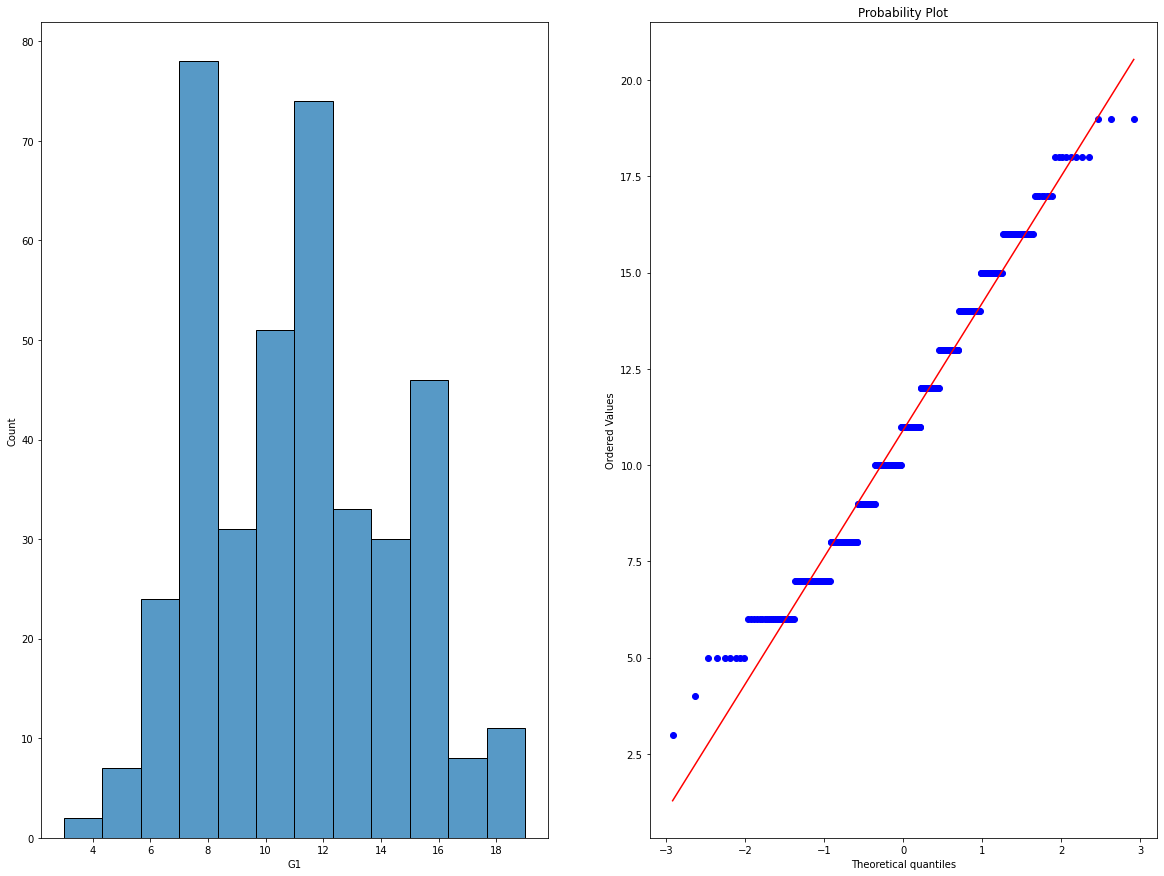

In [56]:
check_gaussain(data,'G1')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

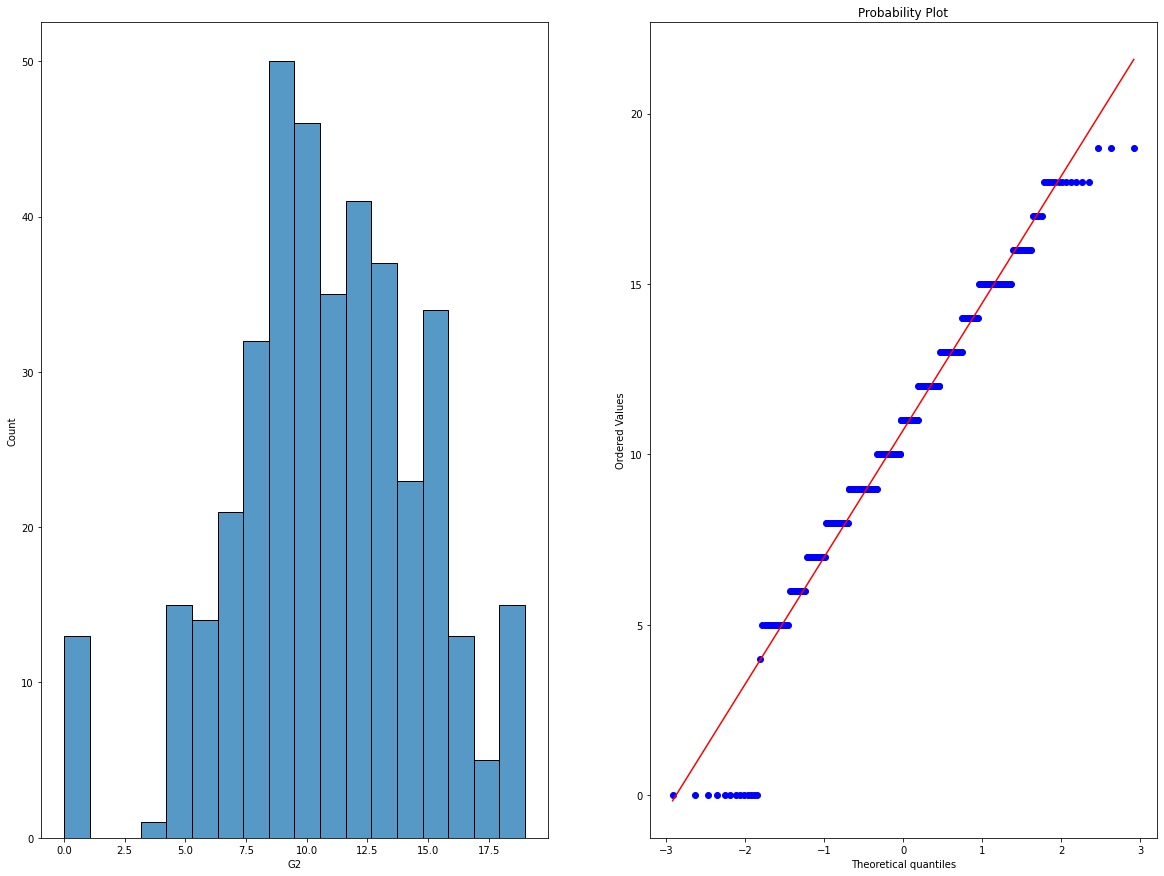

In [57]:
check_gaussain(data,'G2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

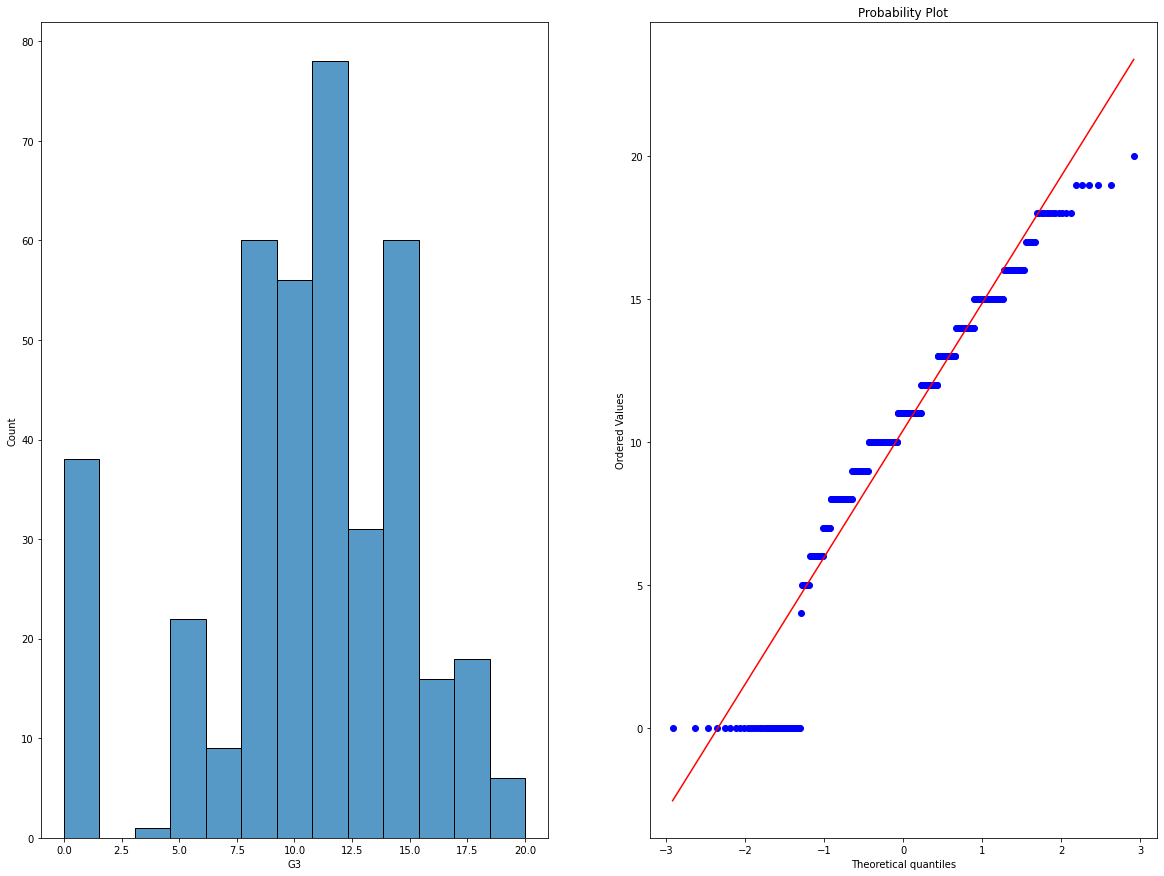

In [58]:
check_gaussain(data,'G3')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

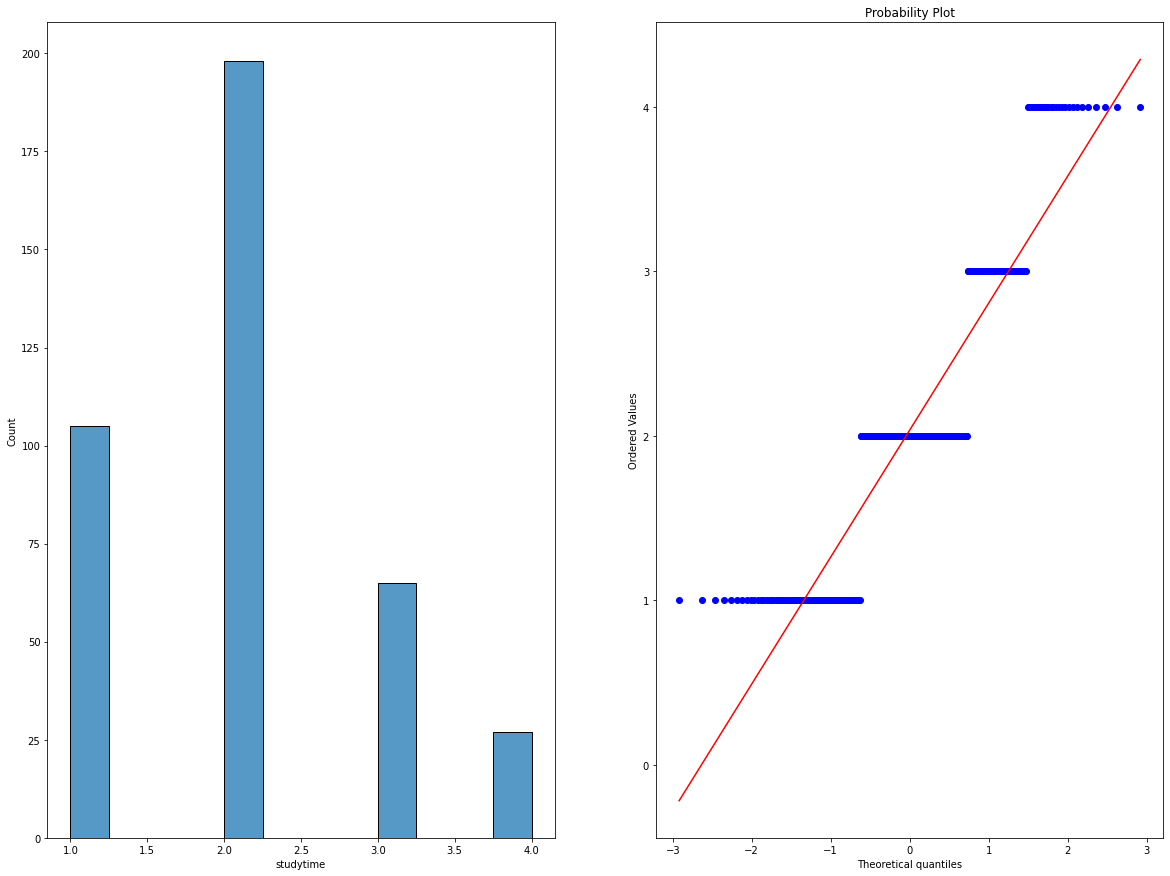

In [59]:
check_gaussain(data,'studytime')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

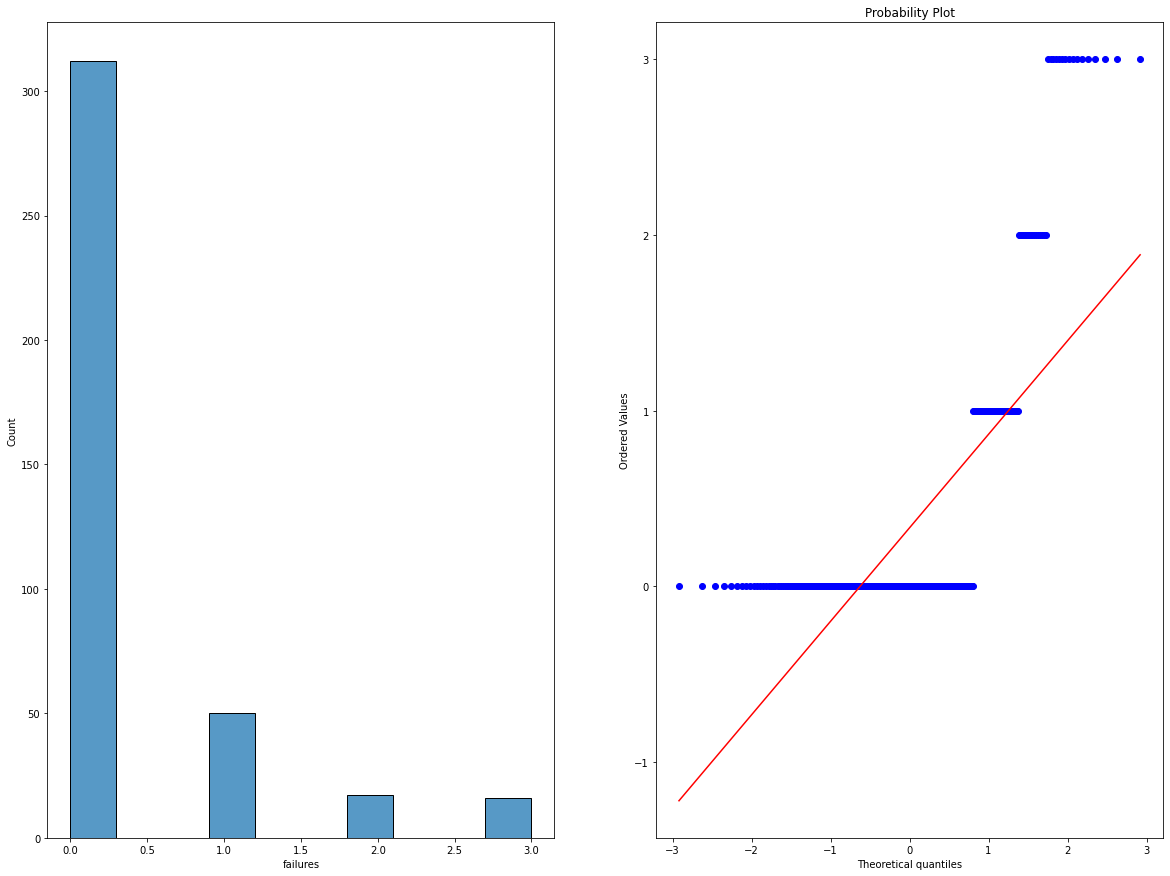

In [60]:
check_gaussain(data,'failures')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

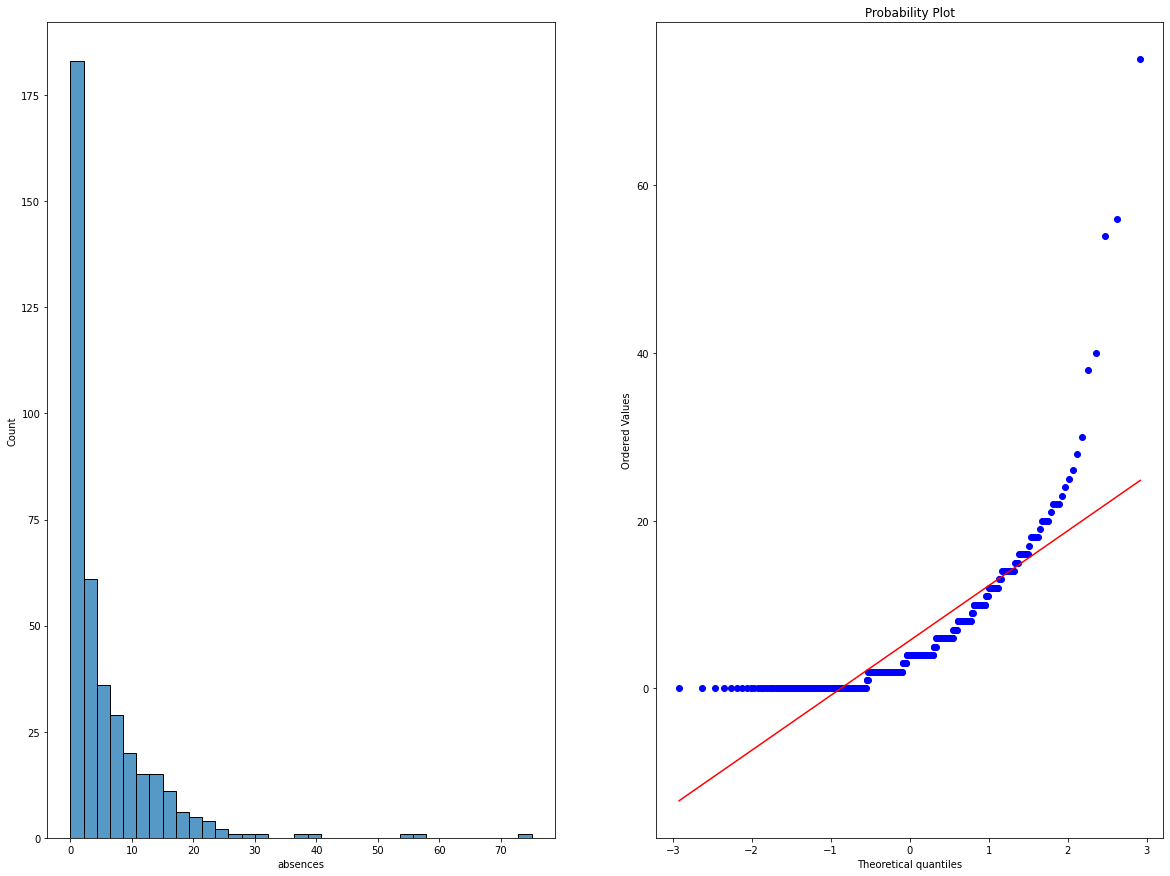

In [61]:
check_gaussain(data,'absences')

# Now we are try to convert Gussain Distribution So that we are using Few Transformation like Logarethemic or Boxcox Transformation --- Here we go

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

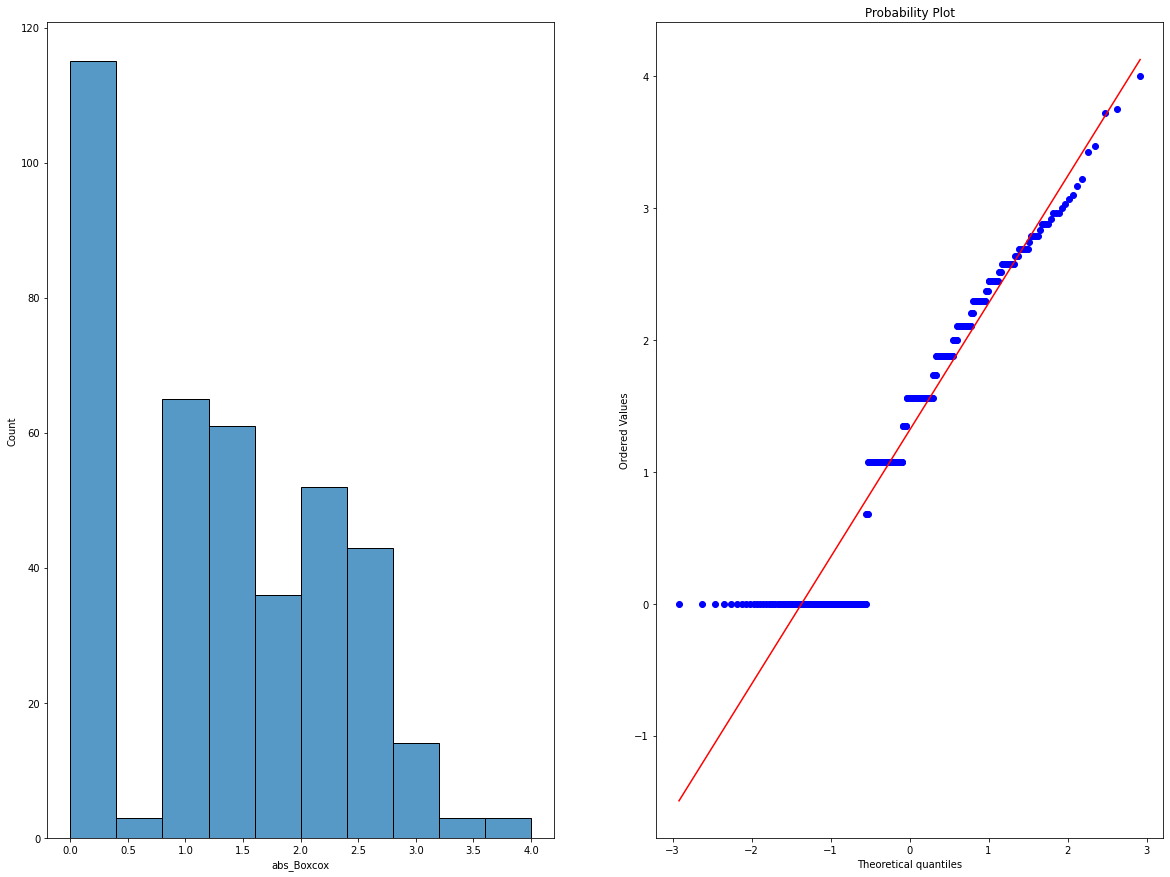

In [67]:
data['abs_Boxcox'],parameters=stat.boxcox(data['absences']+1)
check_gaussain(data,'abs_Boxcox')
#if I found any negative value during the transformation we need to use +1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

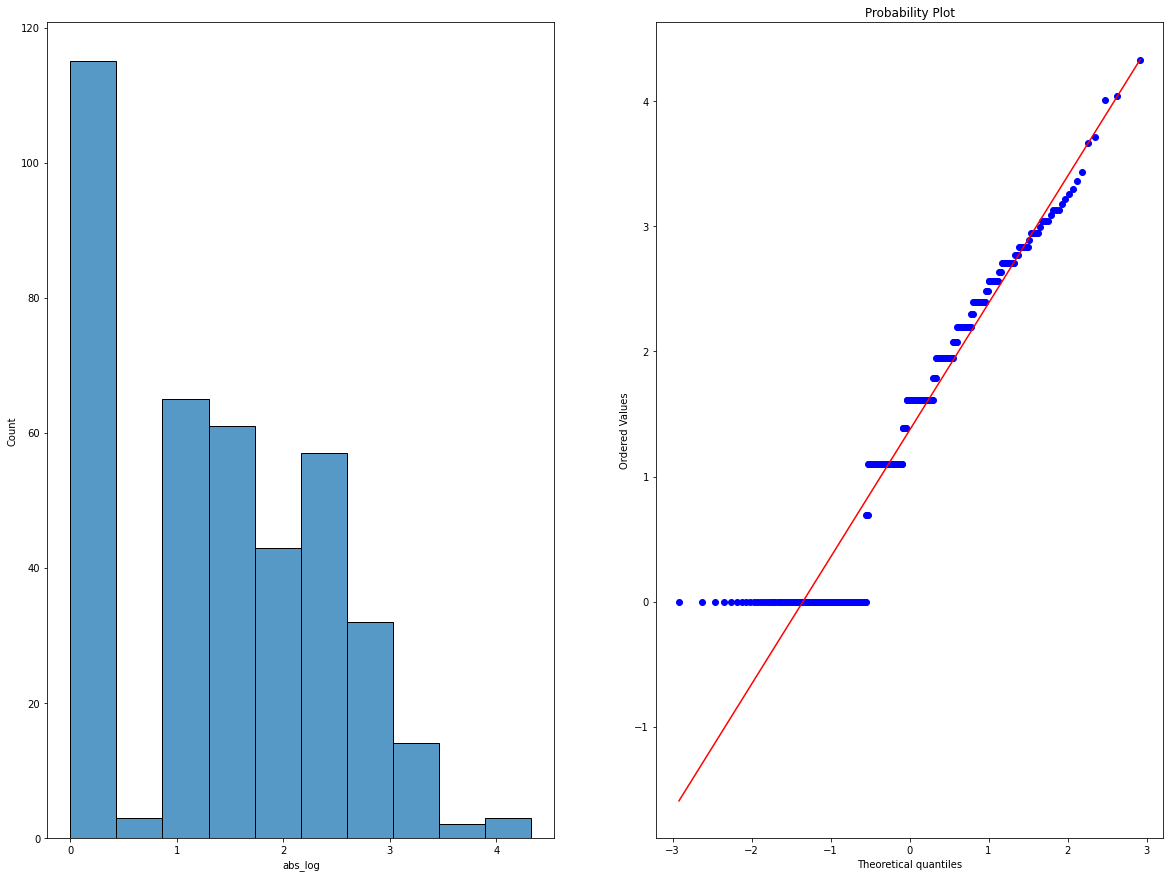

In [70]:
data['abs_log']=np.log(data.absences+1)
check_gaussain(data,'abs_log') #whenever our data have right squit then we need to use log transformation like np.log1p or +1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

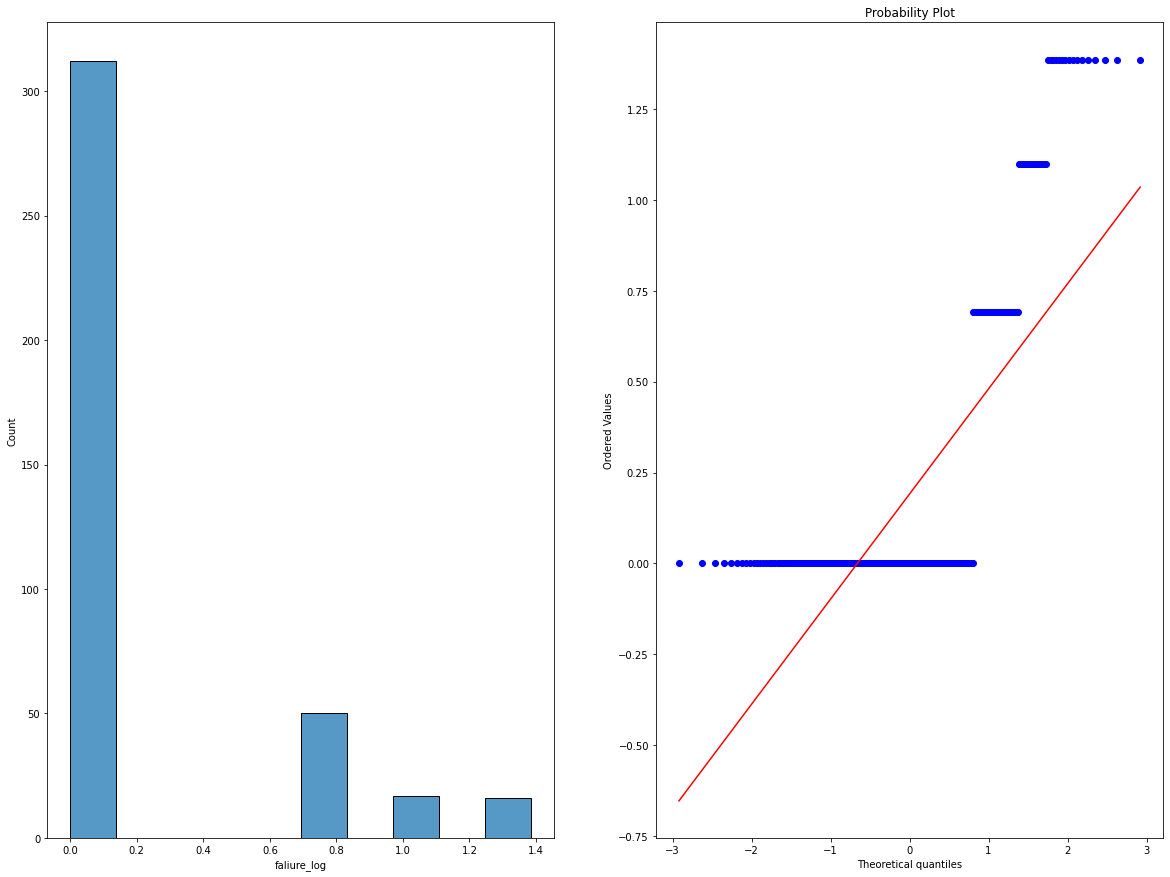

In [71]:
data['faliure_log']=np.log(data.failures+1)
check_gaussain(data,'faliure_log')
#this ntransformation we are not taken

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

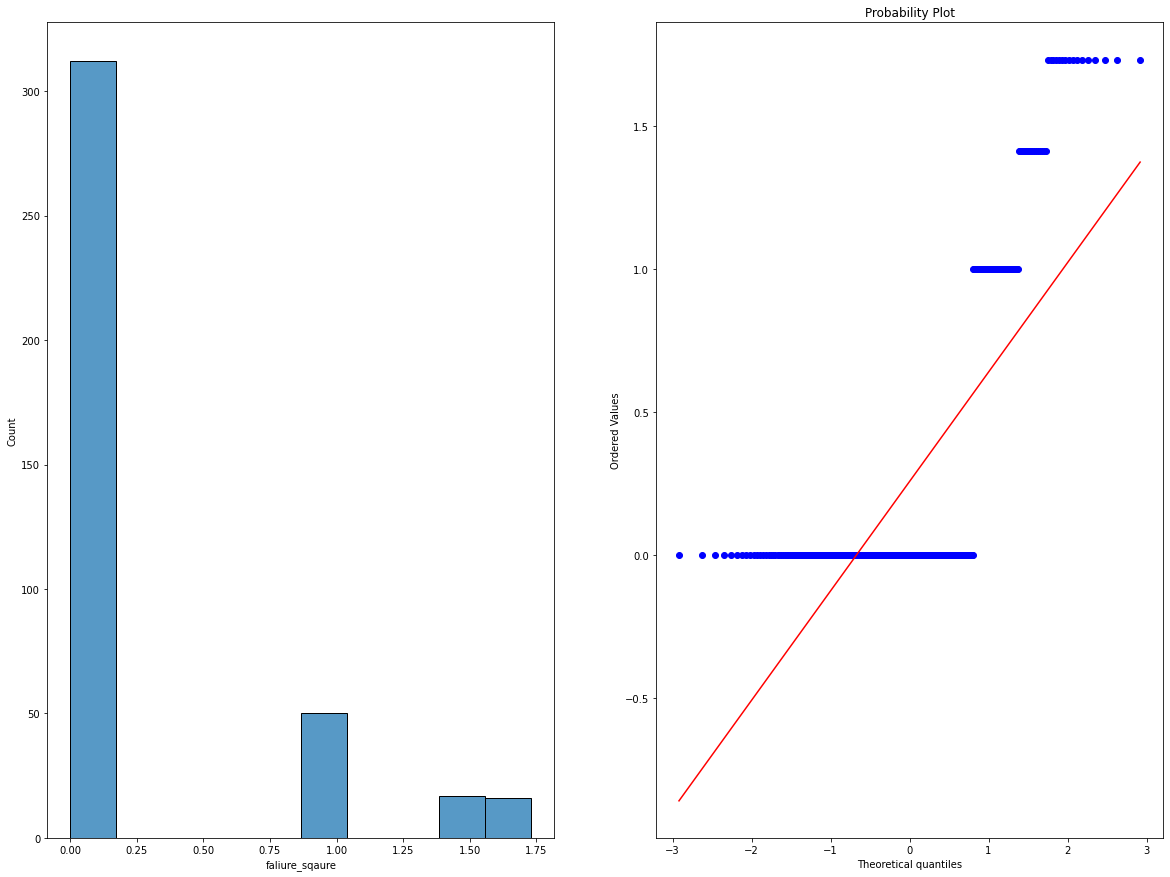

In [73]:
##### Square Root Transformation
data['faliure_sqaure']=data.failures**(1/2)
check_gaussain(data,'faliure_sqaure')
#this also I'll not taken

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

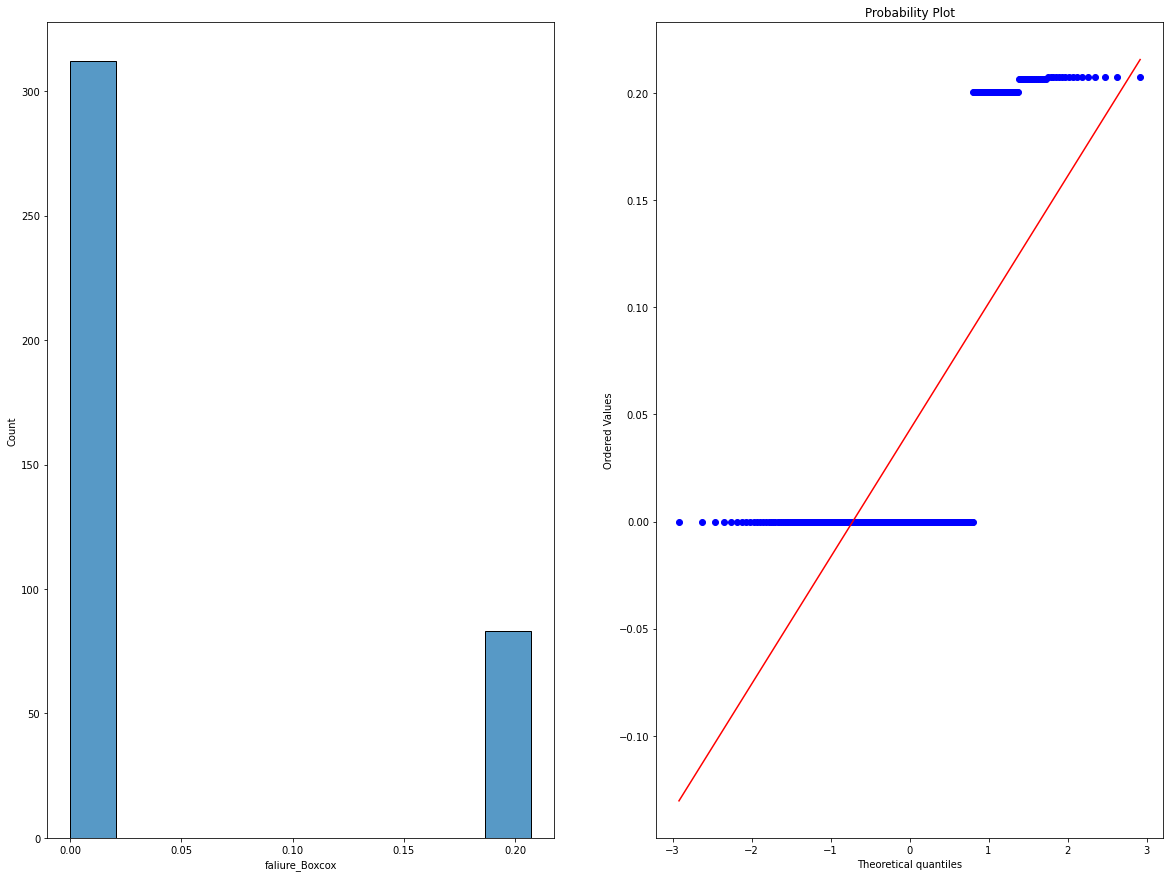

In [74]:
data['faliure_Boxcox'],parameters=stat.boxcox(data['failures']+1)
check_gaussain(data,'faliure_Boxcox')
#thsi also we are not taken

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

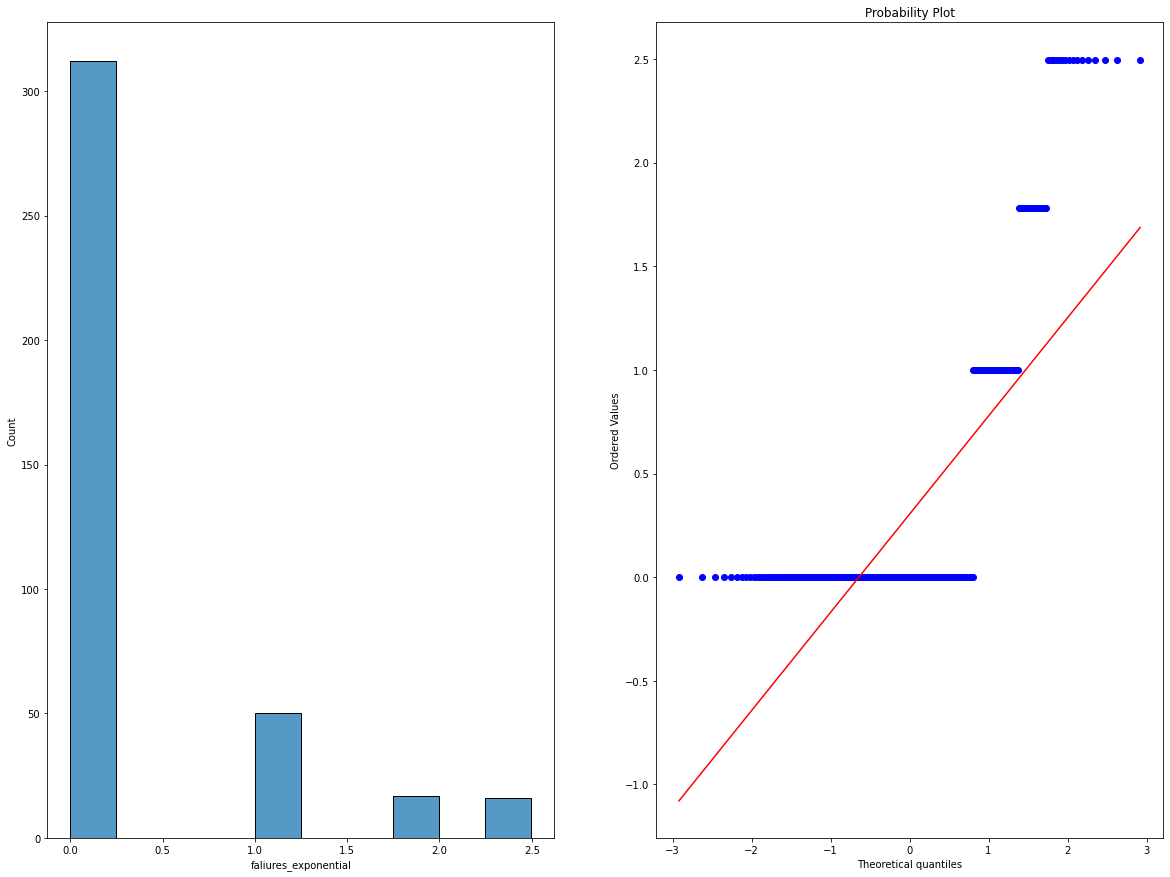

In [77]:
#### Exponential Transdormation
data['faliures_exponential']=data.failures**(1/1.2)
check_gaussain(data,'faliures_exponential')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

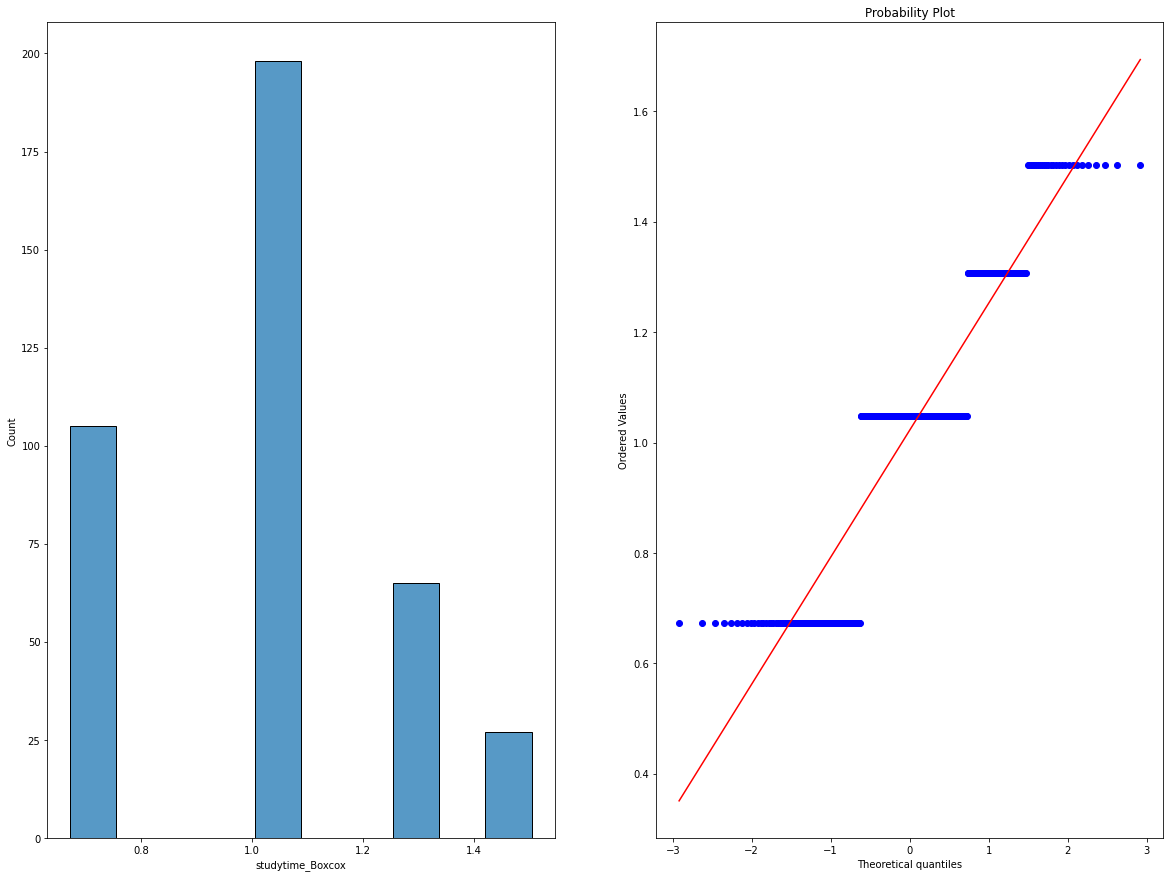

In [79]:
data['studytime_Boxcox'],parameters=stat.boxcox(data['studytime']+1)
check_gaussain(data,'studytime_Boxcox') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

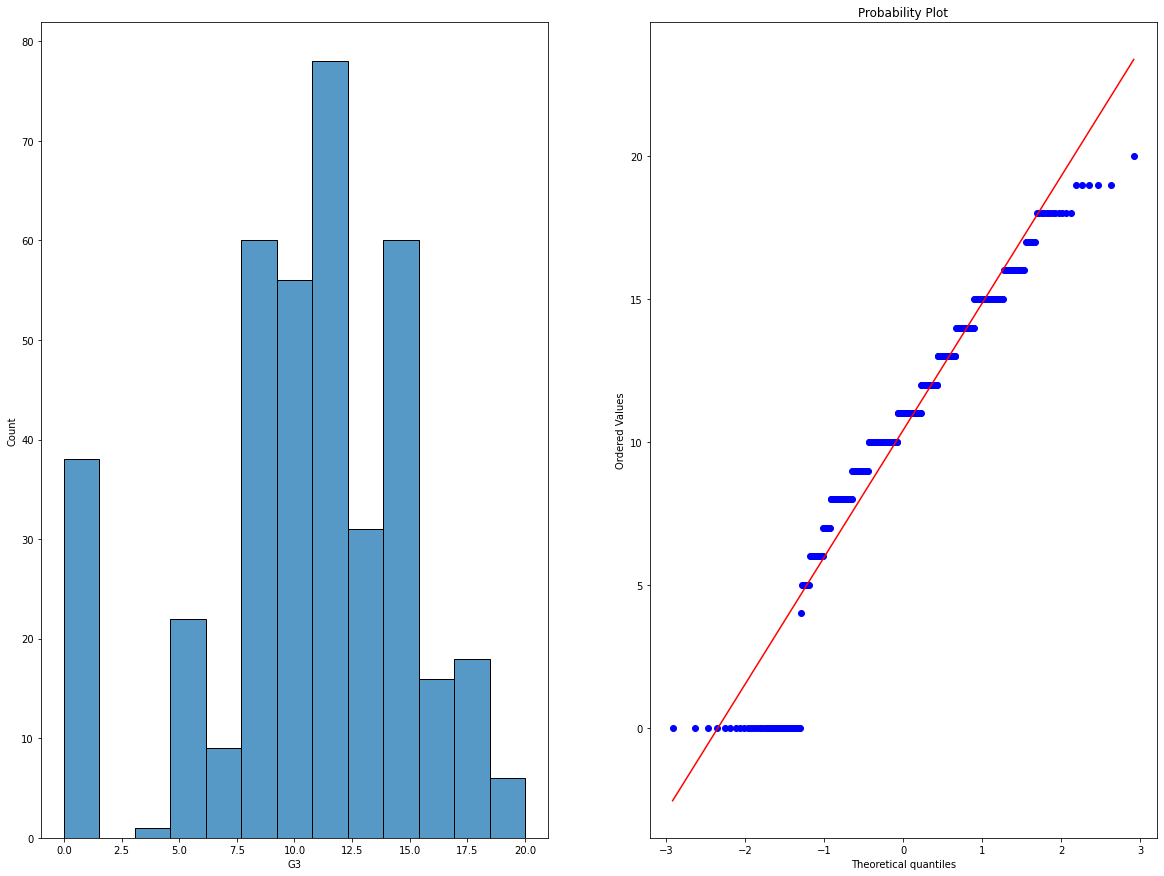

In [80]:
data['G3_Boxcox'],parameters=stat.boxcox(data['G3']+1)
check_gaussain(data,'G3')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

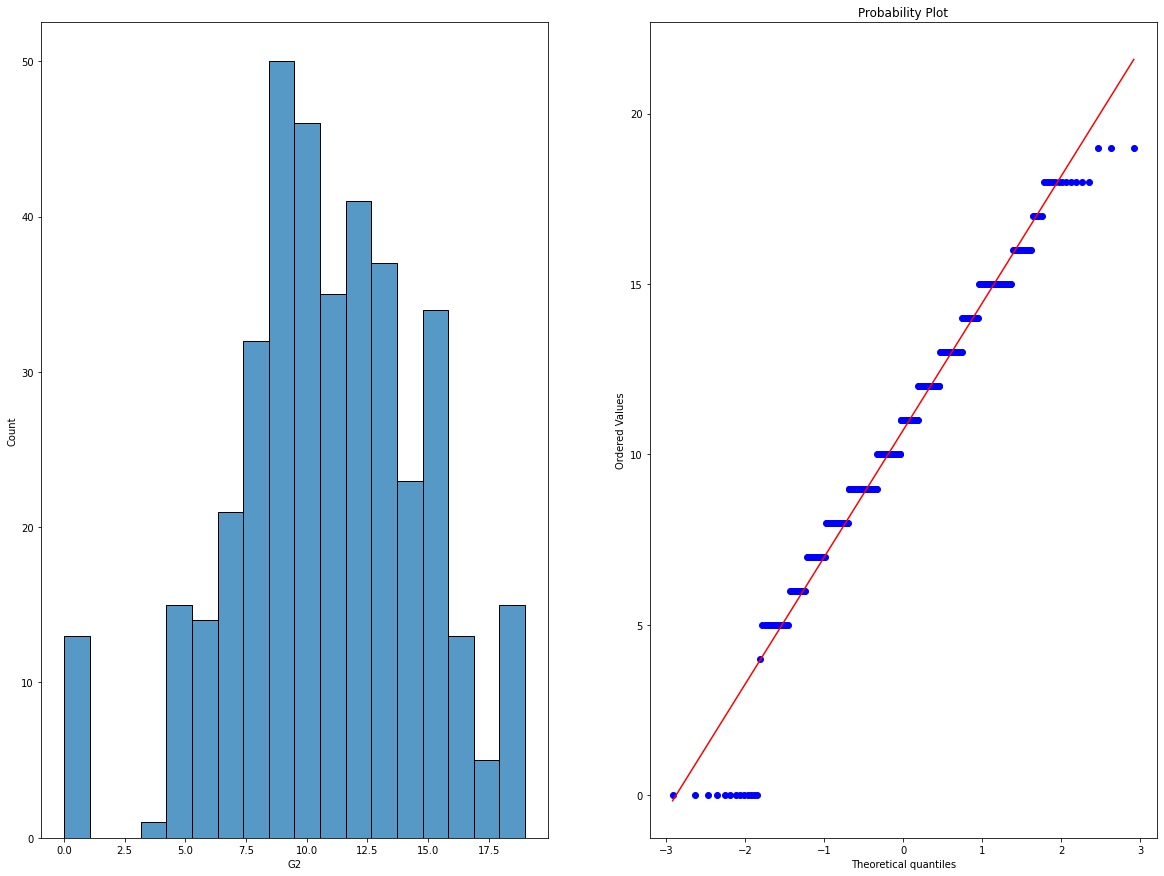

In [81]:
data['G2_Boxcox'],parameters=stat.boxcox(data['G2']+1)
check_gaussain(data,'G2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

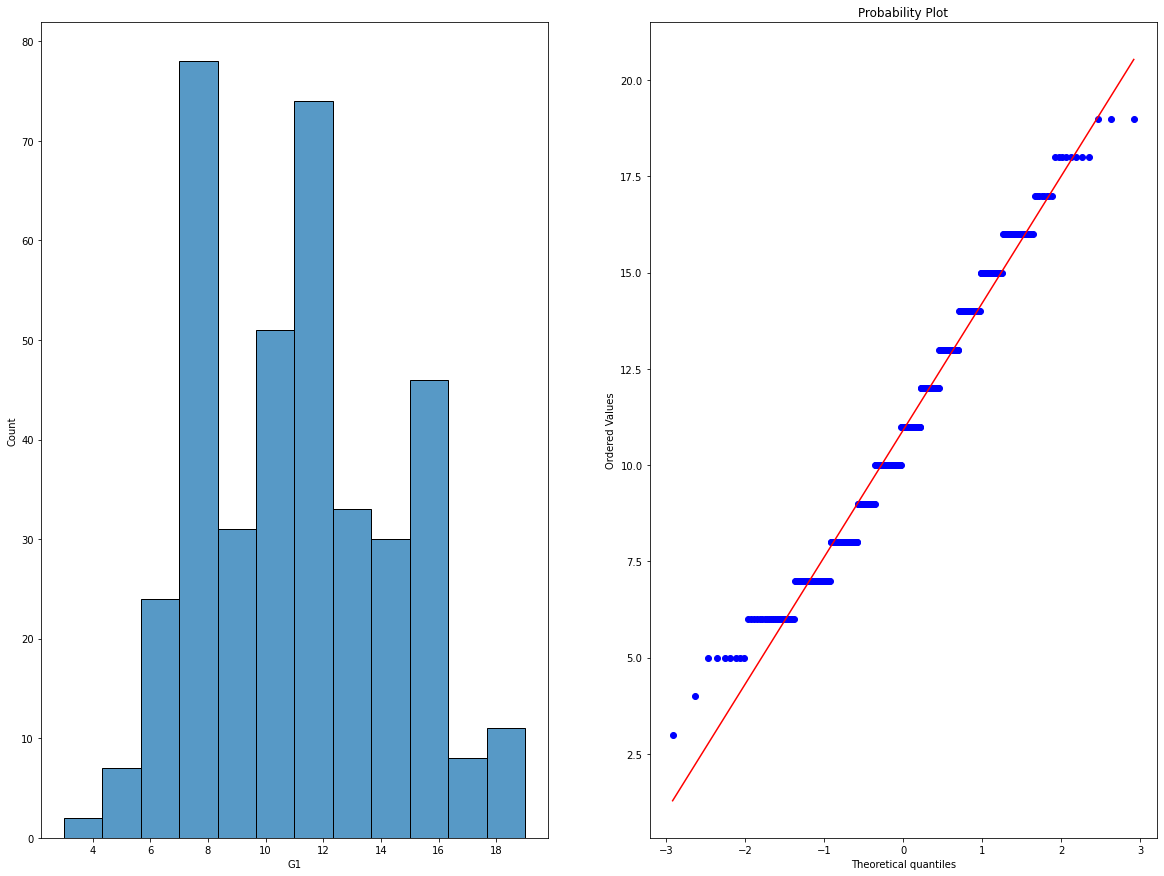

In [82]:
data['G1_Boxcox'],parameters=stat.boxcox(data['G1']+1)
check_gaussain(data,'G1')

In [83]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,abs_Boxcox,abs_log,faliure_log,faliure_sqaure,faliure_Boxcox,faliures_exponential,studytime_Boxcox,G3_Boxcox,G2_Boxcox,G1_Boxcox
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1.877883,1.945910,0.000000,0.000000,0.000000,0.000000,1.048538,8.597064,8.350804,2.891767
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1.562712,1.609438,0.000000,0.000000,0.000000,0.000000,1.048538,8.597064,6.743054,2.891767
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,2.295159,2.397895,1.386294,1.732051,0.207358,2.498050,1.048538,15.912661,11.739242,3.646088
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,1.076704,1.098612,0.000000,0.000000,0.000000,0.000000,1.307201,26.143211,22.989261,5.975381
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,1.562712,1.609438,0.000000,0.000000,0.000000,0.000000,1.048538,15.912661,15.325742,3.282515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,2.374695,2.484907,1.098612,1.414214,0.206575,1.781797,1.048538,14.001379,13.509706,4.310248
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,1.351533,1.386294,0.000000,0.000000,0.000000,0.000000,0.672985,28.308058,27.030885,5.723029
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,1.351533,1.386294,1.386294,1.732051,0.207358,2.498050,0.672985,10.339000,11.739242,4.617188
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.672985,15.912661,19.082450,4.910401


In [84]:
data = data[["G1_Boxcox", "G2_Boxcox", "G3_Boxcox", "studytime_Boxcox", "faliures_exponential", "abs_log"]]
data

,G1_Boxcox,G2_Boxcox,G3_Boxcox,studytime_Boxcox,faliures_exponential,abs_log
0,2.891767,8.350804,8.597064,1.048538,0.000000,1.945910
1,2.891767,6.743054,8.597064,1.048538,0.000000,1.609438
2,3.646088,11.739242,15.912661,1.048538,2.498050,2.397895
3,5.975381,22.989261,26.143211,1.307201,0.000000,1.098612
4,3.282515,15.325742,15.912661,1.048538,0.000000,1.609438
...,...,...,...,...,...,...
390,4.310248,13.509706,14.001379,1.048538,1.781797,2.484907
391,5.723029,27.030885,28.308058,0.672985,0.000000,1.386294
392,4.617188,11.739242,10.339000,0.672985,2.498050,1.386294
393,4.910401,19.082450,15.912661,0.672985,0.000000,0.000000


In [123]:
data.isnull().sum()

G1_Boxcox               0
G2_Boxcox               0
G3_Boxcox               0
studytime_Boxcox        0
faliures_exponential    0
abs_log                 0
dtype: int64

In [85]:
test = data


,G1_Boxcox,G2_Boxcox,G3_Boxcox,studytime_Boxcox,faliures_exponential,abs_log
0,2.891767,8.350804,8.597064,1.048538,0.000000,1.945910
1,2.891767,6.743054,8.597064,1.048538,0.000000,1.609438
2,3.646088,11.739242,15.912661,1.048538,2.498050,2.397895
3,5.975381,22.989261,26.143211,1.307201,0.000000,1.098612
4,3.282515,15.325742,15.912661,1.048538,0.000000,1.609438
...,...,...,...,...,...,...
390,4.310248,13.509706,14.001379,1.048538,1.781797,2.484907
391,5.723029,27.030885,28.308058,0.672985,0.000000,1.386294
392,4.617188,11.739242,10.339000,0.672985,2.498050,1.386294
393,4.910401,19.082450,15.912661,0.672985,0.000000,0.000000


Basically in this Project we are using Linear Regression Model so that it's good practice to do Scaling / Standard Scaller that means the value mean is 0 & standard Devation is 1

the standar scaller operation down by column wise so that 0 --- 5 represnt G1_Boxcox", "G2_Boxcox", "G3_Boxcox", "studytime_Boxcox", "faliures_exponential", "abs_log

In [86]:
#### standarisation: We use the Standardscaler from sklearn library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
test_d = sc.fit_transform(test)

In [87]:
test_d_f = pd.DataFrame(test_d)
test_d_f

<IPython.core.display.Javascript object>

,0,1,2,3,4,5
0,-1.996956,-1.268999,-1.041743,0.105119,-0.467950,0.545167
1,-1.996956,-1.505855,-1.041743,0.105119,-0.467950,0.226416
2,-1.214078,-0.769807,-0.166650,0.105119,3.371585,0.973347
3,1.203399,0.887567,1.057130,1.144228,-0.467950,-0.257505
4,-1.591415,-0.241437,-0.166650,0.105119,-0.467950,0.226416
...,...,...,...,...,...,...
390,-0.524773,-0.508979,-0.395278,0.105119,2.270696,1.055776
391,0.941494,1.482986,1.316089,-1.403558,-0.467950,0.015025
392,-0.206213,-0.769807,-0.833372,-1.403558,3.371585,0.015025
393,0.098101,0.312008,-0.166650,-1.403558,-0.467950,-1.298256


The dataset I'm using to predict students' grades is based on what the pupils at Portuguese schools have accomplished. The G1 represents the first period's grades, the G2 represents the second period's grades, and the G3 represents the final grades in this dataset. Let's prepare the data now and see how we can forecast the kids' final grades:

In [92]:
X = np.array(test_d_f[[0,1,3,4,5]])
y = np.array(test_d_f[2])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [93]:
#here G3/G3_Boxcox or '2' is our target Featuture

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

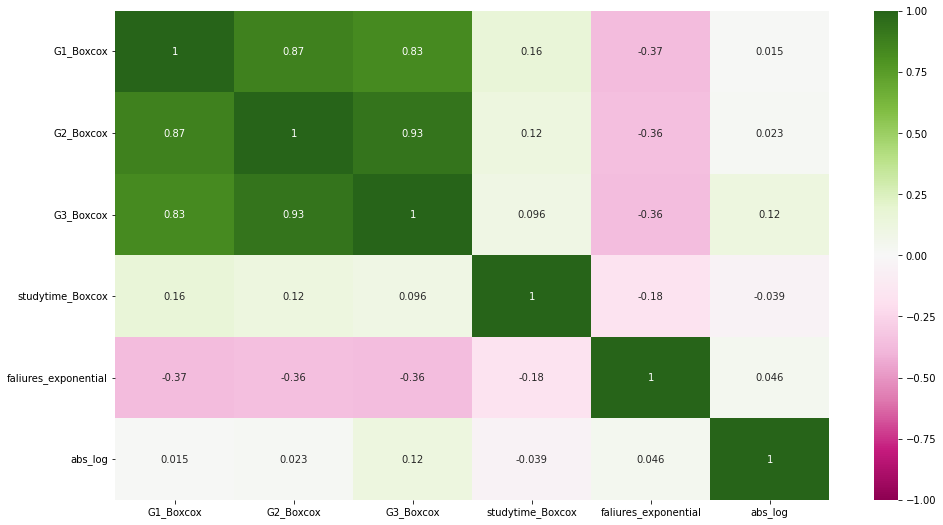

In [121]:
plt.figure(figsize=(16,9))
sns.heatmap(data.corr(),annot = True,vmax=1,vmin=-1,cmap="PiYG")

# Now preperaing the model Linear Regression

In [105]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression

In [96]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=55)
linear = LinearRegression()

In [100]:
mse = cross_val_score(linear,xtrain,ytrain,cv=15,verbose=3,n_jobs=-1,scoring='neg_mean_squared_error')
mse 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:    2.5s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    2.5s finished


array([-0.03968805, -0.07431061, -0.06219815, -0.03721664, -0.18576948,
       -0.06131442, -0.05116009, -0.18529224, -0.12798414, -0.03686317,
       -0.06476467, -0.08198497, -0.28032838, -0.15593028, -0.17482755])

In [101]:
np.mean(mse)

<IPython.core.display.Javascript object>

-0.10797552317432119

# Using Linear Regression

In [103]:
linear.fit(xtrain,ytrain)

LinearRegression()

In [104]:
linear.score(xtest,ytest)

0.8324742199430647

# Using Ridge Regression

In [109]:
#now ridge & lasso regression
from sklearn.linear_model import Ridge
linear_ridge = Ridge()
param_grid = {
    'alpha' : [5,9,25,45,65,1e-20,1e-45,1e-3,1e-1,100],
    'max_iter': [10,25,36,12,4,2,55,65,29,39]
}

In [110]:
grid_cv = GridSearchCV(linear_ridge,param_grid=param_grid,cv=15,verbose=3,n_jobs=-1,refit=True,scoring='neg_mean_squared_error')
grid_cv.fit(xtrain,ytrain)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=15, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [5, 9, 25, 45, 65, 1e-20, 1e-45, 0.001, 0.1,
                                   100],
                         'max_iter': [10, 25, 36, 12, 4, 2, 55, 65, 29, 39]},
             scoring='neg_mean_squared_error', verbose=3)

In [111]:
grid_cv.best_params_

{'alpha': 0.1, 'max_iter': 10}

In [112]:
grid_cv.best_score_

-0.10796677110936767

In [113]:
grid_cv.predict(xtest)

array([ 0.97057636,  0.42982608,  1.2377343 ,  0.56379334, -1.70893854,
       -0.95647928,  0.20059595, -1.03300838,  0.23752044,  0.19811353,
        0.30689393,  0.96626684, -0.54536109,  0.69846803, -1.12943685,
       -0.47746865,  0.43629284,  0.25226998,  0.26862326,  0.37610187,
        1.67441364,  2.26639393,  1.1025217 ,  0.94341232, -0.88952416,
       -0.14337827,  0.96497969,  1.79016632,  0.83619787,  0.97057636,
       -0.47746865,  0.88582581,  1.49713186,  1.1083062 , -0.50274994,
        0.67045953, -0.45310145,  0.84028481, -0.53659903, -1.11846582,
        0.40514092, -0.54536109,  0.7176909 , -0.18731343,  1.10286731,
       -0.39828239, -0.72657131, -0.94610972, -0.57217868, -0.07677346,
        1.28693813,  0.15688199,  0.70727756, -0.14328482,  1.11406058,
        0.29278479, -0.05118943,  0.03625228, -1.12895886, -0.40427263,
        1.77003188, -0.82989042, -0.35991725, -0.56341373, -0.32497829,
        0.54480678, -0.40663715,  1.39713728, -2.48338983, -0.35

# Using Lasso Regression

In [114]:
from sklearn.linear_model import Lasso
la = Lasso()
param_grid = {
    'alpha' : [5,9,25,45,65,1e-20,1e-45,1e-3,1e-1,100,1,2,3,4,5,6,7,8,9],
    'max_iter': [10,25,36,12,4,2,55,65,29,39,68,99]
}
grid_cv_lasso = GridSearchCV(la,param_grid=param_grid,cv=15,verbose=3,n_jobs=-1,refit=True,scoring='neg_mean_squared_error')
grid_cv_lasso.fit(xtrain,ytrain)

Fitting 15 folds for each of 228 candidates, totalling 3420 fits


GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [5, 9, 25, 45, 65, 1e-20, 1e-45, 0.001, 0.1,
                                   100, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_iter': [10, 25, 36, 12, 4, 2, 55, 65, 29, 39, 68,
                                      99]},
             scoring='neg_mean_squared_error', verbose=3)

In [115]:
grid_cv_lasso.best_params_

{'alpha': 0.001, 'max_iter': 25}

In [117]:
grid_cv_lasso.best_score_

-0.10787680175183896

In [119]:
grid_cv_lasso.predict(xtest)

array([ 0.97097922,  0.42933816,  1.23689811,  0.5632751 , -1.70686645,
       -0.95487262,  0.20127335, -1.03153812,  0.23353439,  0.19642349,
        0.30458309,  0.96445791, -0.54196256,  0.69904113, -1.12842397,
       -0.47734547,  0.43705937,  0.25470009,  0.26658108,  0.37483566,
        1.67104415,  2.26243315,  1.09967091,  0.94208985, -0.88953874,
       -0.14193368,  0.96542559,  1.78759474,  0.83664619,  0.97097922,
       -0.47734547,  0.88269004,  1.49716612,  1.10858428, -0.50431187,
        0.6687149 , -0.4510956 ,  0.83762032, -0.53635017, -1.11529978,
        0.40512466, -0.54196256,  0.71924304, -0.18556041,  1.10201549,
       -0.39857738, -0.72812597, -0.94340593, -0.57316119, -0.07997744,
        1.28497191,  0.15574119,  0.70527447, -0.14261177,  1.1129786 ,
        0.29380869, -0.04939834,  0.03610988, -1.12681504, -0.39951854,
        1.77020464, -0.82835224, -0.35746965, -0.56083444, -0.32735528,
        0.54049981, -0.40495747,  1.39391987, -2.48039609, -0.35

so in the above mode we are using diffrent type of regrssion model & hyperparameter tuning & predicate the output based on the output / after seeing negative mean sqared error we are deciding that the error is optimal 